# CLASSIFICATION  and SHAP TUTORIAL

Shap is a popular explainable AI package using which we can understand which features affect our model decisions and how they contribute to global predictions (feature importance) and local interpretations (decision path of classification of single data instance).

## Objective

This notebook aims to understand and use SHap package for this mobile classification dataset in order to understand what are the factors which influence a mobile to be in a particular price range . Which features of a mobile affects is price and whter they impact it positively or negatively. 

The notebook is divided into majorly:
* Feature Selection Using Ensemble trees Model (RandomForest & GradientBoosting)
* Shap Explainer for Trees
* Feature Selection & Tuning using SHAP Tune Package
* SVM Model
* Kernel Explainer for SVM 

## CONTENTS



# Import Libraries

In [1]:
# !pip install shap

In [2]:
# !pip install cuml
# !pip install cupy-cuda110

In [3]:
import pandas as pd
import os
import numpy as np
# import cuml
# import cupy
######----------For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
sns.set(rc={'figure.figsize':(15,5)})
plt.style.use('fivethirtyeight')

######----------For Feature Selection and Modeling
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

######---------For SHAP/Model Explainations
import shap

In [4]:
# !pip install --upgrade pandas

In [5]:
# !pip install --upgrade dask dask-cudf cudf cuml

In [6]:
# import tensorflow as tf
# print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# Load Data

In [7]:
train = pd.read_csv("/kaggle/input/dataset/encoded_dataset.csv")

#train= pd.read_csv(os.path.join(DATAPATH,"train.csv"))
#test= pd.read_csv(os.path.join(DATAPATH,"test.csv"))

In [8]:
train.head()

,list,length,entropy,md5_int1,md5_int2,md5_int3,md5_int4,sha1_int1,sha1_int2,sha1_int3,sha1_int4,sha1_int5,sha256_int1,sha256_int2,sha256_int3,sha256_int4,sha256_int5,sha256_int6,sha256_int7,sha256_int8
0,Whitelist,211456,2.231824,447,496,628,654,695,206,702,303,687,51,315,866,950,96,152,509,645
1,Whitelist,17584,6.143784,414,499,642,539,412,283,62,307,459,45,304,257,651,565,34,34,750
2,Whitelist,47104,5.694129,952,576,12,713,264,373,228,253,825,866,373,93,862,513,770,14,812
3,Whitelist,242816,3.918845,932,309,403,542,335,602,437,270,162,656,959,55,84,854,575,433,431
4,Whitelist,119240,6.168794,264,876,545,379,985,773,876,61,781,919,922,164,594,138,842,484,884


In [9]:
#Check columns 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201549 entries, 0 to 201548
Data columns (total 20 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   list         201549 non-null  object 
 1   length       201549 non-null  int64  
 2   entropy      201549 non-null  float64
 3   md5_int1     201549 non-null  int64  
 4   md5_int2     201549 non-null  int64  
 5   md5_int3     201549 non-null  int64  
 6   md5_int4     201549 non-null  int64  
 7   sha1_int1    201549 non-null  int64  
 8   sha1_int2    201549 non-null  int64  
 9   sha1_int3    201549 non-null  int64  
 10  sha1_int4    201549 non-null  int64  
 11  sha1_int5    201549 non-null  int64  
 12  sha256_int1  201549 non-null  int64  
 13  sha256_int2  201549 non-null  int64  
 14  sha256_int3  201549 non-null  int64  
 15  sha256_int4  201549 non-null  int64  
 16  sha256_int5  201549 non-null  int64  
 17  sha256_int6  201549 non-null  int64  
 18  sha256_int7  201549 non-

In [10]:
labelencoder = LabelEncoder()

train['list'] = labelencoder.fit_transform(train['list'])
train

,list,length,entropy,md5_int1,md5_int2,md5_int3,md5_int4,sha1_int1,sha1_int2,sha1_int3,sha1_int4,sha1_int5,sha256_int1,sha256_int2,sha256_int3,sha256_int4,sha256_int5,sha256_int6,sha256_int7,sha256_int8
0,1,211456,2.231824,447,496,628,654,695,206,702,303,687,51,315,866,950,96,152,509,645
1,1,17584,6.143784,414,499,642,539,412,283,62,307,459,45,304,257,651,565,34,34,750
2,1,47104,5.694129,952,576,12,713,264,373,228,253,825,866,373,93,862,513,770,14,812
3,1,242816,3.918845,932,309,403,542,335,602,437,270,162,656,959,55,84,854,575,433,431
4,1,119240,6.168794,264,876,545,379,985,773,876,61,781,919,922,164,594,138,842,484,884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201544,0,764928,7.885477,932,674,559,340,325,708,748,15,932,246,273,579,457,407,270,335,971
201545,0,710144,7.952831,118,19,422,795,350,389,903,62,62,742,979,836,647,397,706,873,70
201546,0,637200,6.883626,936,277,370,640,39,112,401,890,522,79,607,880,231,693,367,729,260
201547,0,1013904,6.677207,828,241,714,823,365,905,614,1003,98,602,1,897,956,265,73,851,824


In [11]:
# X = train[['length', 'entropy', 'sha1_int3']]
# y = train['list']
# X.shape, y.shape

((201549, 3), (201549,))

In [11]:
X = train.drop(columns='list',axis=1)
y = train['list']
X.shape, y.shape

((201549, 19), (201549,))

In [12]:
# Stratified sampling
X_subset, _, y_subset, _ = train_test_split(X, y, test_size=0.9, stratify=y, random_state=42)

# Combine back to a DataFrame if needed
train = pd.concat([X_subset, y_subset], axis=1)
train.reset_index(drop=True, inplace=True)

In [13]:
train

,length,entropy,md5_int1,md5_int2,md5_int3,md5_int4,sha1_int1,sha1_int2,sha1_int3,sha1_int4,sha1_int5,sha256_int1,sha256_int2,sha256_int3,sha256_int4,sha256_int5,sha256_int6,sha256_int7,sha256_int8,list
0,746072,6.842036,854,684,545,162,246,366,370,846,802,942,380,403,346,826,486,945,706,1
1,92216,6.327912,77,811,405,779,293,668,145,681,951,984,143,63,863,843,561,997,886,1
2,50688,6.950683,145,279,465,854,31,437,176,652,711,448,593,997,343,815,787,867,579,0
3,22168,6.930243,678,30,906,583,332,752,267,266,338,1001,922,512,371,419,681,152,939,1
4,1829376,6.498455,873,731,21,997,949,773,546,117,397,871,201,801,647,436,200,793,441,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20149,1260032,5.131723,9,584,421,777,73,543,4,772,427,307,61,581,185,177,665,888,680,1
20150,675328,7.326846,272,138,249,377,277,572,436,598,998,523,20,907,234,859,789,250,565,0
20151,142336,6.759130,772,712,73,301,412,391,422,66,570,132,920,570,998,199,678,933,523,0
20152,28672,6.109413,371,513,500,339,907,885,353,668,260,455,593,469,801,582,762,709,673,0


In [14]:
#Seperating target
Xtrain = train.drop(columns='list',axis=1)
Ytrain = train.list

In [15]:
Xtrain

,length,entropy,md5_int1,md5_int2,md5_int3,md5_int4,sha1_int1,sha1_int2,sha1_int3,sha1_int4,sha1_int5,sha256_int1,sha256_int2,sha256_int3,sha256_int4,sha256_int5,sha256_int6,sha256_int7,sha256_int8
0,746072,6.842036,854,684,545,162,246,366,370,846,802,942,380,403,346,826,486,945,706
1,92216,6.327912,77,811,405,779,293,668,145,681,951,984,143,63,863,843,561,997,886
2,50688,6.950683,145,279,465,854,31,437,176,652,711,448,593,997,343,815,787,867,579
3,22168,6.930243,678,30,906,583,332,752,267,266,338,1001,922,512,371,419,681,152,939
4,1829376,6.498455,873,731,21,997,949,773,546,117,397,871,201,801,647,436,200,793,441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20149,1260032,5.131723,9,584,421,777,73,543,4,772,427,307,61,581,185,177,665,888,680
20150,675328,7.326846,272,138,249,377,277,572,436,598,998,523,20,907,234,859,789,250,565
20151,142336,6.759130,772,712,73,301,412,391,422,66,570,132,920,570,998,199,678,933,523
20152,28672,6.109413,371,513,500,339,907,885,353,668,260,455,593,469,801,582,762,709,673


In [16]:
Ytrain

0        1
1        1
2        0
3        1
4        0
        ..
20149    1
20150    0
20151    0
20152    0
20153    0
Name: list, Length: 20154, dtype: int64

In [17]:
#Train Test Split

X_train,X_test,Y_train,Y_test = train_test_split(Xtrain,Ytrain,test_size=0.25,random_state=1200,stratify = Ytrain)
print(X_train.shape , X_test.shape)

(15115, 19) (5039, 19)


## Random Forest

In [18]:
clf0= RandomForestClassifier(n_estimators=100,random_state=1200)
clf0.fit(X_train,Y_train)
std = np.std([tree.feature_importances_ for tree in clf0.estimators_], axis=0)
feature_importances = pd.Series(clf0.feature_importances_, index=X_train.columns)

print('Score of RF model on test split\n',clf0.score(X_test,Y_test))

Score of RF model on test split
 0.7809089104981147


## GRadient Boosting Tree

In [20]:
clf= GradientBoostingClassifier(n_estimators=100,random_state=1200)
clf.fit(X_train,Y_train)

feature_importances = pd.Series(clf.feature_importances_, index=X_train.columns)

print('Score of Gradient Boosting model on test split\n',clf.score(X_test,Y_test))

Score of Gradient Boosting model on test split
 0.7922206787060925


In [22]:
#Feature selectiong for Random Forest Classifier Fitted Model
model0 = SelectFromModel(clf0, prefit=True) #we set prefit true since we are passing a fitted model as parameter
X_train_new = model0.transform(X_train)   #drops unimportant features

print('Shape of transformed Train set:',X_train_new.shape)
feature_names = X_train.columns[model0.get_support()]
print('Feature Names \n',feature_names)

Shape of transformed Train set: (15115, 2)
Feature Names 
 Index(['length', 'entropy'], dtype='object')


X has feature names, but SelectFromModel was fitted without feature names


# SHAP 
> 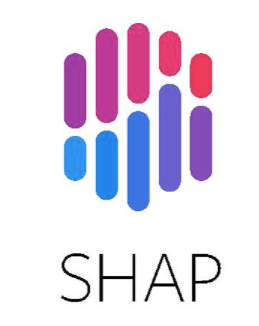

**SHAP (SHapley Additive exPlanations)** is a unified approach to explain the output of any machine learning model.

It combines game theory with machine learning models.
It has optimized functions for interpreting tree-based models and a model agnostic explainer function for interpreting any black-box model for which the predictions are known.
In summary, Shapley’s values calculate the importance of a feature by comparing what a model predicts with and without this feature. However, since the order in which a model sees the features can aﬀect its predictions, this is done in all possible ways, so that the features are compared fairly. This approach is inspired by game theory.
SHAP is used to explain an existing model. Taking a binary classification case built with a sklearn model. We train, tune and test our model. Then we can use our data and the model to create an additional SHAP model that explains our classification model.

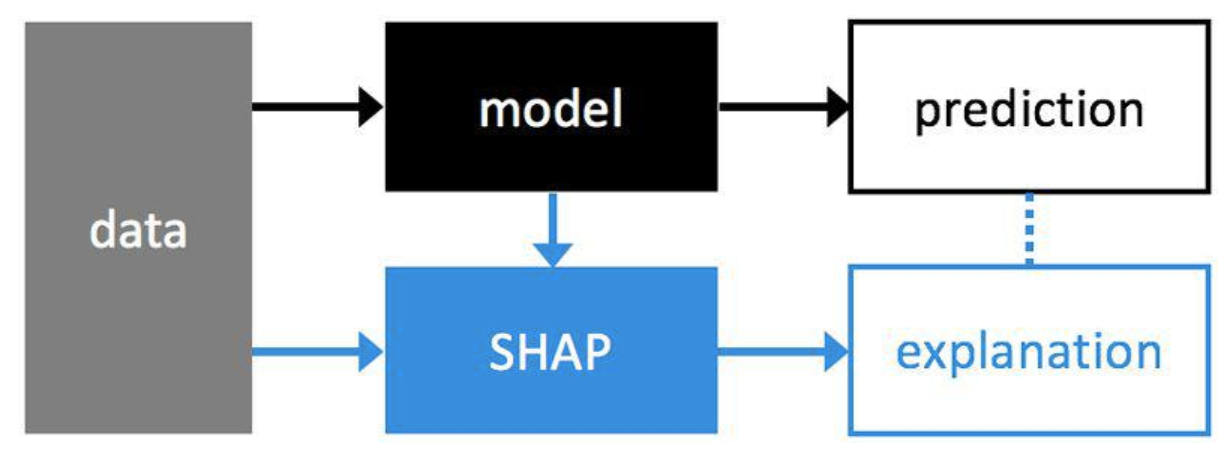

## SHAP Values using Explainer
We first create shap values using our model and data.

**shap_values** :  the average contribution of each feature to each prediction for each sample based on all possible features. It is a (n,m) n — samples, m — features matrix that represents the contribution of each feature to each sample.

* **Expected Values** : For our multiclass classification task shap explainer produces 4 expected values corresponding to each class probability. Here if we see each class expected value is 0.25 which is the probability of class label based on frequency of label only.
* Expected value is important as we shall see how the probability of belonging to a class is driven up or down from this base value to the final predicted value by the model at each step of feature value contribution .
   * *Note : For price range 0 = 500/2000 = 0.25, price range 1 = 500/2000 =0.25*
This is the probability obtained when no feature values are present then base probability is probability of belonging to the particular class label based on freq of class label in target variable.


* **Shap Values** :  The shap values of each class can be observerd below . If binary class then they are  *complementary* for binary classification.  

   * The *highest magnitude *contribution for* 'Price Range 0' class in below table is by the feature : 'ram' = 0.415436 , followed by 'px_height'=0.068004	 * all these features contribute positively towards the 'Price Range 0' class probability i.e. drives the probability for Price Range 0 class upwards.


> <span style="color:red">**IMPORTANT NOTE : Some Tree models such as xgboost,light gbm output logit (log-odds) instead probability so the shap expected values and shap values describe the logit odds instead of probability directly so caution should be taken when interpreting such models.**</span>

In [22]:
# creating an explainer for our model
explainer = shap.TreeExplainer(clf0) # we only need to pass our  fitted model to tree explainer. 
                                    #No background dataset in 'data' argument required for tree models as it
                                    #is automatically received through the model tree object.

# finding out the shap values using the explainer
shap_values = explainer.shap_values(X_train)

# Expected/Base/Reference value = the value that would be predicted if we didn’t know any features of the current output”
print('Expected Value:', explainer.expected_value)

Expected Value: [0.56917433 0.43082567]


In [23]:
# Shap Values for class = 0 that is malware class
print("Shap Values for benign class")
pd.DataFrame(shap_values[0],columns=X_train.columns).head()

Shap Values for benign class


,length,entropy,sha1_int3
0,-0.165282,-0.278127,-0.055765
1,-0.137344,-0.210768,-0.041063
2,0.196058,-0.110442,0.095210
3,0.015621,0.389785,0.005420
4,-0.024070,0.457973,-0.013077


In [24]:
# Shap Values for class = 1 that is benign class
print("Shap Values for malware class")
pd.DataFrame(shap_values[1],columns=X_train.columns).head()

Shap Values for malware class


,length,entropy,sha1_int3
0,0.165282,0.278127,0.055765
1,0.137344,0.210768,0.041063
2,-0.196058,0.110442,-0.095210
3,-0.015621,-0.389785,-0.005420
4,0.024070,-0.457973,0.013077


# SHAP Summary Plot

* The summary plot gives a global picture and similar to feature importance plot of tress . Here how each feature impacts the model for each class is shown.

    * Summary for Single Class -  A summary plot for single class gives us densit  
    * Summary plot for all classes

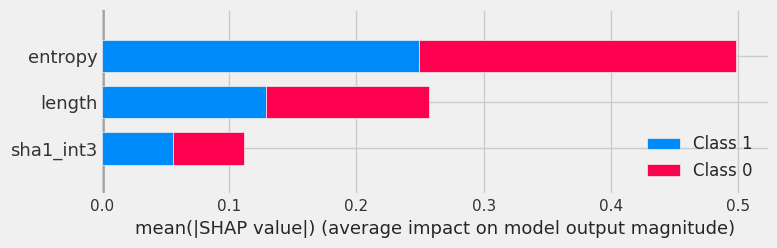

In [30]:
shap.initjs()
shap.summary_plot(shap_values, X_test)

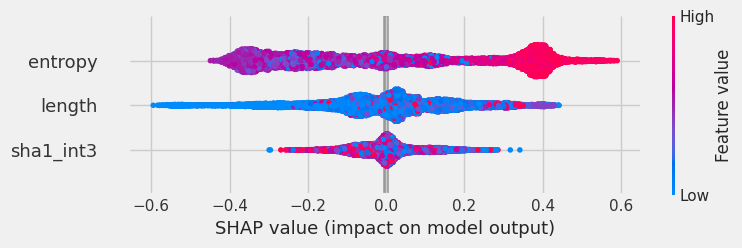

In [31]:
shap.initjs()
shap.summary_plot(shap_values[0], X_train)

In [37]:
shap.initjs()
shap.decision_plot(explainer.expected_value[2], 
                shap_values_test[2][3,:], X_test.iloc[3,:])

IndexError: index 2 is out of bounds for axis 0 with size 2

In [38]:
clf0_modified = clf0.fit(X_train_new,Y_train)

NameError: name 'X_train_new' is not defined

## References 

https://github.com/cerlymarco/shap-hypetune/blob/main/notebooks/XGBoost_usage.ipynb


https://scikit-learn.org/stable/modules/feature_selection.html#feature-selection-using-selectfrommodel

https://medium.com/analytics-vidhya/shap-part-2-kernel-shap-3c11e7a971b1